<a href="https://colab.research.google.com/github/2403a52029-lab/NLP_LAB-ASSIGNMENTS/blob/main/NLP_LAB_10_2403A52029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install gensim if not already installed
!pip install gensim

# For loading pre-trained embeddings
import gensim.downloader as api

# For numerical operations
import numpy as np

# For visualization
import matplotlib.pyplot as plt

# For dimensionality reduction
from sklearn.manifold import TSNE

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 36.4 MB/s eta 0:00:00
Libraries imported successfully!


In [3]:
print("Loading pre-trained model...")
model = api.load("glove-wiki-gigaword-100")  # 100-dimensional vectors
print("Model loaded successfully!")

# Print vocabulary size
print("Vocabulary Size:", len(model))

# Show one example vector
word = "king"
print(f"\nVector for '{word}':\n", model[word])


Loading pre-trained model...
[==================================================] 100.0% 128.1/128.1MB downloaded
Model loaded successfully!
Vocabulary Size: 400000

Vector for 'king':
 [-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.2

In [4]:
# Animals, Cities, Countries, Technology, Emotions
word_list = [
    # Animals
    "dog", "cat", "lion", "tiger", "elephant", "horse", "wolf", "monkey",

    # Cities
    "paris", "london", "tokyo", "delhi", "mumbai", "beijing", "new_york",

    # Countries
    "india", "china", "france", "germany", "japan", "america",

    # Technology
    "computer", "laptop", "keyboard", "mouse", "internet", "software",
    "hardware", "smartphone",

    # Emotions
    "happy", "sad", "angry", "joy", "fear", "love", "hate",

    # Royal / Family
    "king", "queen", "man", "woman", "boy", "girl"
]

# Extract vectors
vectors = []
valid_words = []

for word in word_list:
    if word in model:
        vectors.append(model[word])
        valid_words.append(word)

vectors = np.array(vectors)

print("Total words used:", len(valid_words))


Total words used: 41


In [5]:
print("Running t-SNE...")

tsne = TSNE(n_components=2, random_state=42, perplexity=10)
reduced_vectors = tsne.fit_transform(vectors)

print("t-SNE completed!")


Running t-SNE...
t-SNE completed!


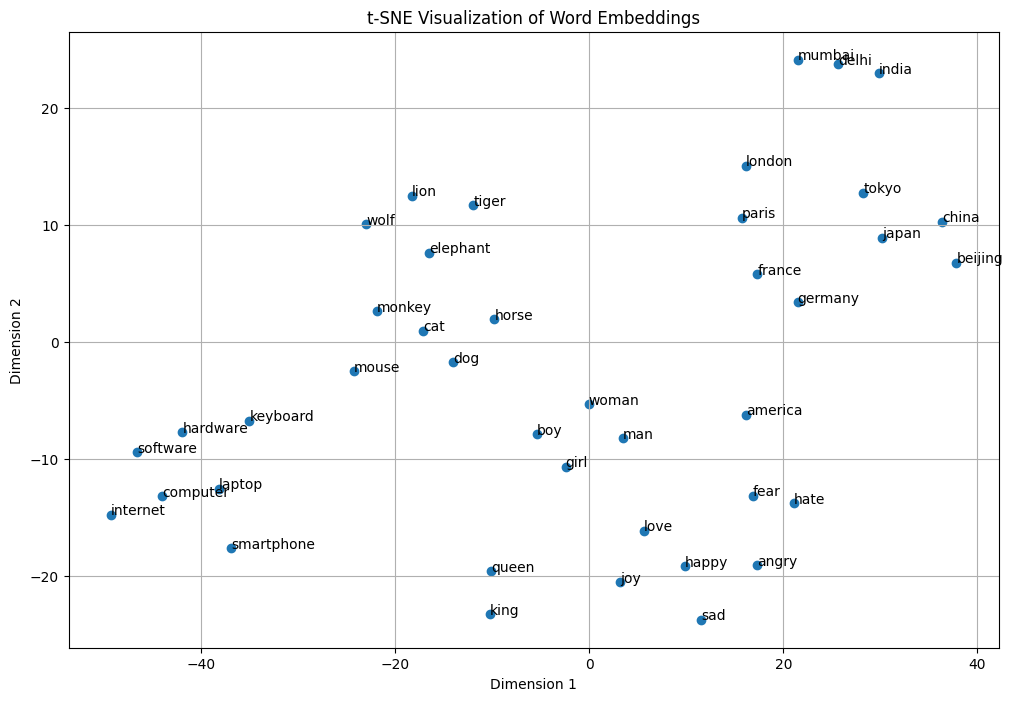

In [6]:
plt.figure(figsize=(12, 8))

x = reduced_vectors[:, 0]
y = reduced_vectors[:, 1]

plt.scatter(x, y)

for i, word in enumerate(valid_words):
    plt.annotate(word, (x[i], y[i]))

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()
